In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
lat = -2
lon = -155

if lat < 0:
    latUnits = 'S'
else:
    latUnits = 'N'

if lon < 0:
    lonUnits = 'W'
else:
    lonUnits = 'E'

lat=abs(lat)
lon=abs(lon)

#ds = Dataset('../../downloads/Buoy/extractedGZ2/WINDS/T_00N_095W_WINDS_2000.nc')
ds = Dataset(f'../../downloads/Buoy/extractedGZ2/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_matchupNearestFour_2000.nc')
ds.variables.keys()

dict_keys(['time', 'U10N_AS', 'U10N_dir_AS', 'satTimeDiff', 'dist', 'satLon', 'satLat', 'U10N_TAO', 'U10N_dir_TAO', 'U10N_TAO2', 'U10N_dir_TAO2', 'U10N_x_TAO2', 'U10N_y_TAO2', 'SST_TAO', 'RH_TAO', 'AIRT_TAO'])

In [8]:
WSPD_QC  = np.array(ds.variables['WSPD_QC'])

KeyError: 'WSPD_QC'

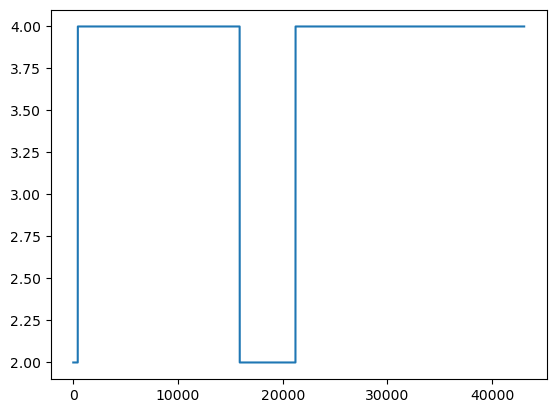

In [9]:
plt.plot(WSPD_QC)

In [10]:
dist = np.array(ds.variables['dist'][:,:])
satWspd = np.array(ds.variables['U10N_AS'][0,:])
satWdir = np.array(ds.variables['U10N_dir_AS'][0,:])

taoWspd = np.array(ds.variables['U10N_TAO'][:])
taoWdir = np.array(ds.variables['U10N_dir_TAO'][:])

satLat = np.array(ds.variables['satLat'][:,:])
satLon = np.array(ds.variables['satLon'][:,:])
satTimeDiff = np.array(ds.variables['satTimeDiff'][:,:])
ds.close()


In [11]:
np.nanmin(dist), np.nanmax(dist), np.nanmin(satTimeDiff), np.nanmax(satTimeDiff)

(0.6356799895234521, 15.43431202361097, -597.0, 596.0)

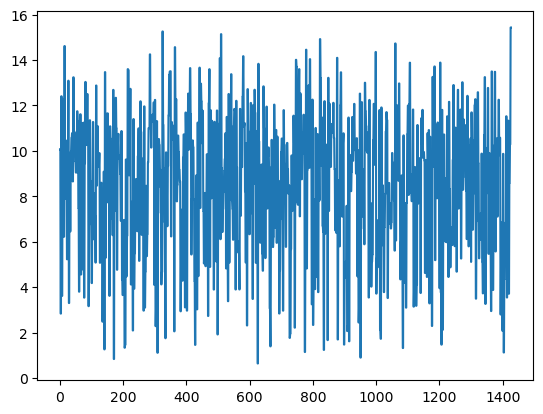

In [12]:
plt.plot(dist[0,:])

In [13]:
minDist = dist[0,:]
#minDist = minDist[~np.isnan(minDist)]

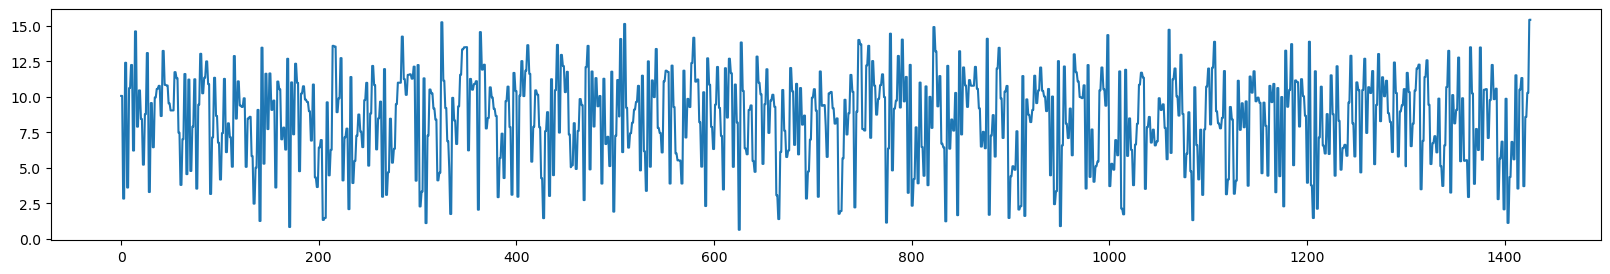

In [14]:
plt.figure(figsize=(20,3))
plt.plot(minDist)

In [15]:
timeDiff = satTimeDiff[0,:]
#timeDiff = timeDiff[~np.isnan(timeDiff)]

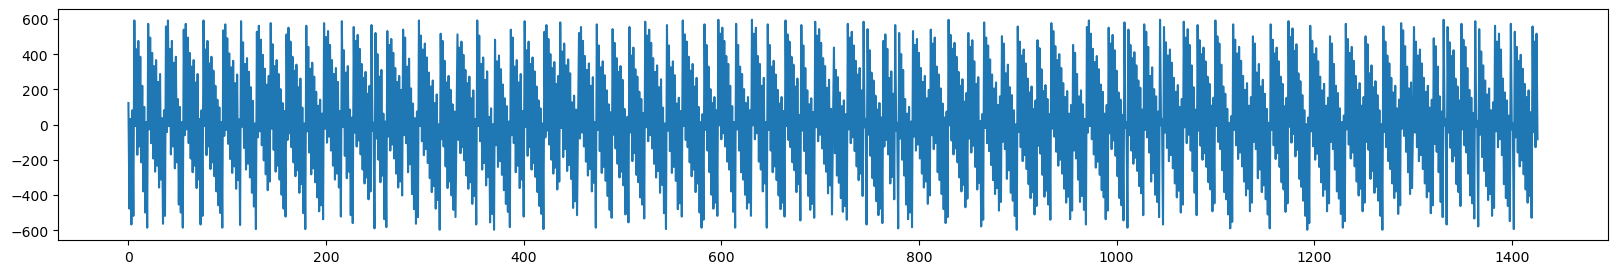

In [16]:
plt.figure(figsize=(20,3))
plt.plot(timeDiff)

5

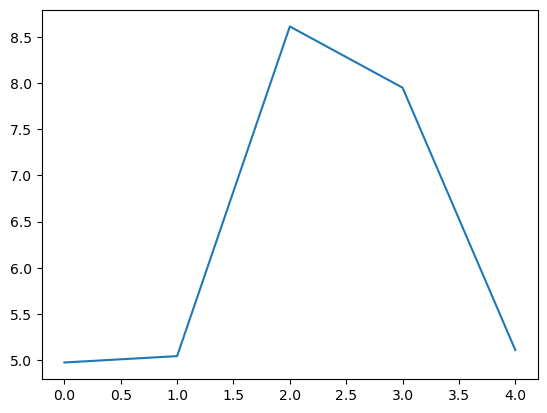

In [17]:
exactTime = abs(timeDiff) < 1
plt.plot(minDist[exactTime])
np.sum(exactTime)

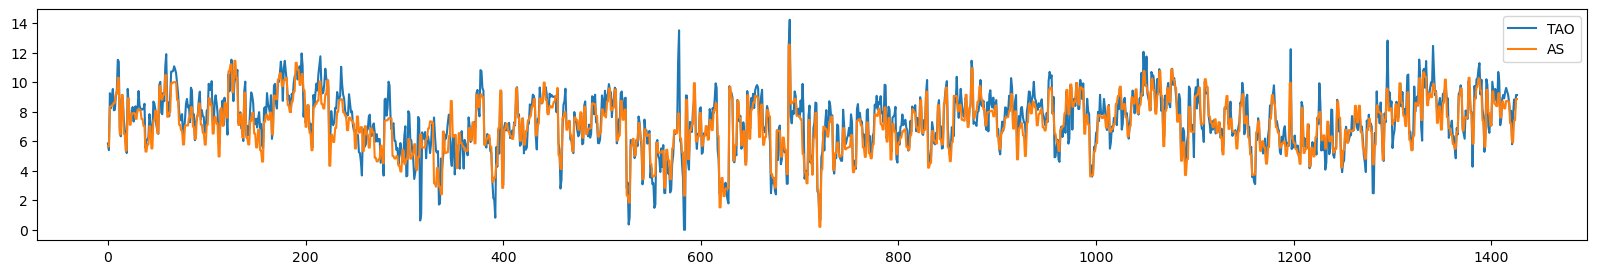

In [18]:
plt.figure(figsize=(20,3))
#mask = abs(satWspd)<100 
#mask *= abs(taoWspd)<100
plt.plot(taoWspd, label='TAO')
plt.plot(satWspd, label='AS')
plt.legend()

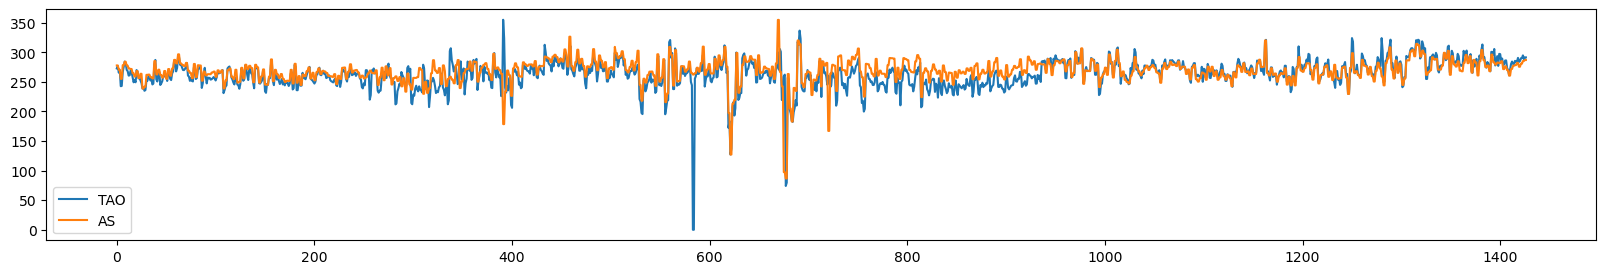

In [19]:
plt.figure(figsize=(20,3))
# mask = abs(satWspd)<100 
# mask *= abs(taoWspd)<100
plt.plot(taoWdir, label='TAO')
plt.plot(satWdir, label='AS')
plt.legend()

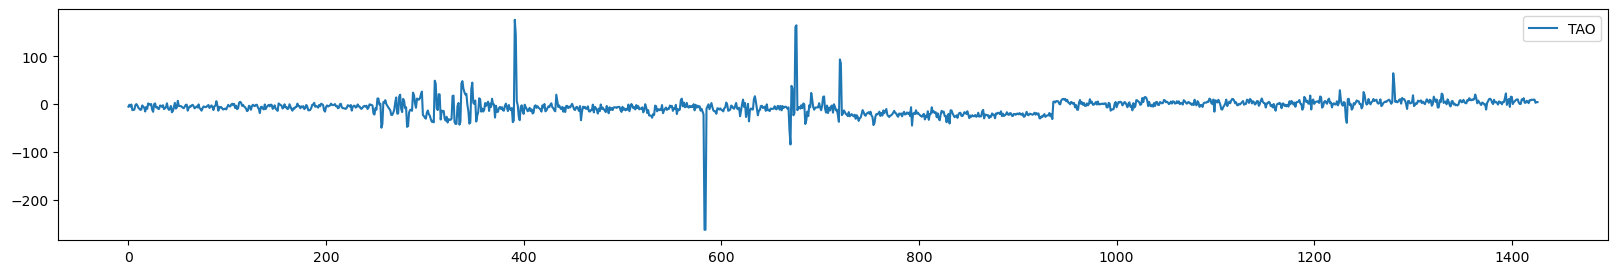

In [21]:
plt.figure(figsize=(20,3))
plt.plot(taoWdir-satWdir, label='TAO')
#plt.ylim(-25,25)
plt.legend()

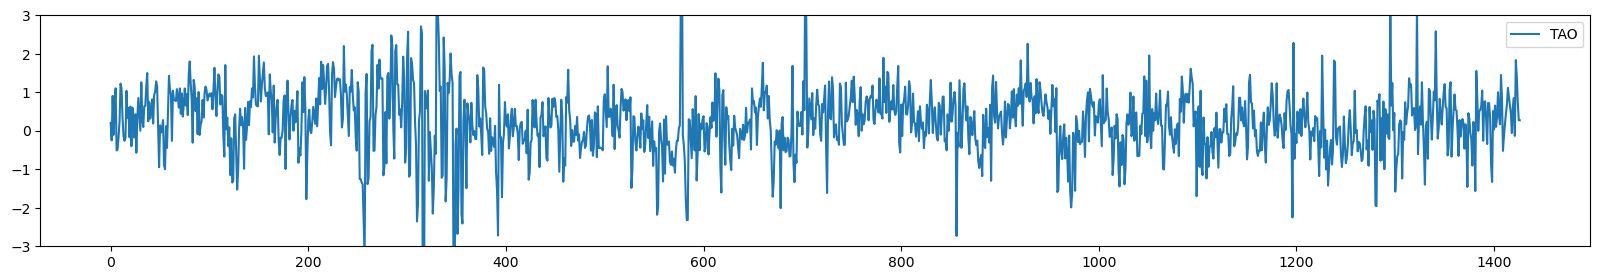

In [23]:
plt.figure(figsize=(20,3))
plt.plot(taoWspd-satWspd, label='TAO')
plt.ylim(-3,3)
plt.legend()

In [24]:
len(taoWspd[mask])

NameError: name 'mask' is not defined